In [87]:
import pandas as pd
from sklearn.calibration import LabelEncoder

# 1. Load the data
df = pd.read_csv('./megablunders.csv')

In [88]:
# use lable encoder to encode the error
label_encoder = LabelEncoder()
df['error'] = label_encoder.fit_transform(df['error'])

In [89]:
#  vectorize the text 
from sentence_transformers import SentenceTransformer

st = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [90]:
embeddings = st.encode(df["original_sentence"])

In [91]:
df.head()

,original_sentence,error
0,By dropping a game to the pathetic Tampa Bay D...,3
1,"Although, if history is any indication, the te...",4
2,"The Sox almost never go down uneventfully, whi...",8
3,Because of the accumulated bad karma that hang...,0
4,The team not only has squandered huge leads bu...,7


In [92]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, df['error'], test_size=0.1, random_state=42)

In [93]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [94]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(768,),
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

/Users/felixstuart/Documents/School/Clubs/Programming Club/Potential Projects/ML Megablunders/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(X_train,y_train, batch_size=16, epochs=50, validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0428 - loss: 2.3691 - val_accuracy: 0.0833 - val_loss: 2.3622
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1418 - loss: 2.3444 - val_accuracy: 0.0833 - val_loss: 2.3612
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2393 - loss: 2.3104 - val_accuracy: 0.0833 - val_loss: 2.3594
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3852 - loss: 2.2947 - val_accuracy: 0.0000e+00 - val_loss: 2.3595
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5480 - loss: 2.2618 - val_accuracy: 0.0000e+00 - val_loss: 2.3612
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4676 - loss: 2.2412 - val_accuracy: 0.0000e+00 - val_loss: 2.3629
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6671 - loss: 2.2065 - val_accuracy: 0.0000e+00 - val_loss: 2.3639
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5428 - loss: 2.1910 - val_accuracy: 0.0000e+00 - val_

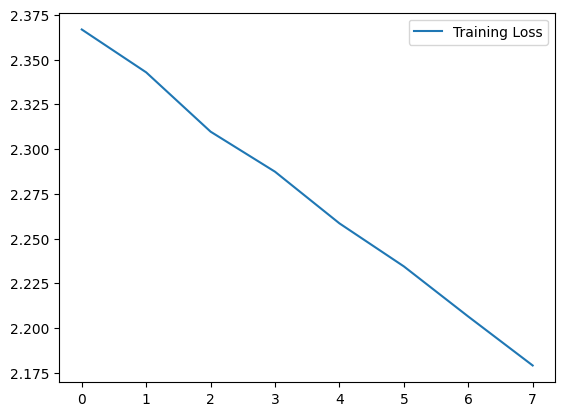

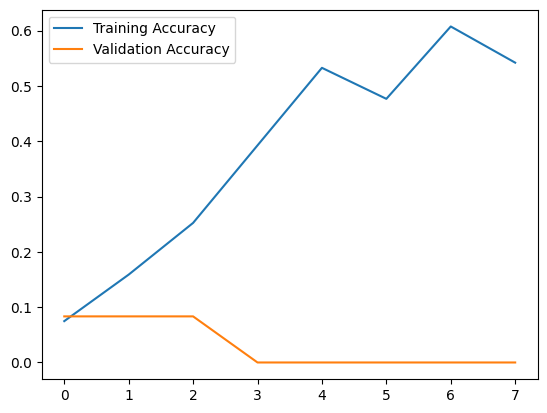

In [98]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [99]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0833 - loss: 2.3594
Test Loss: 2.3594367504119873
Test Accuracy: 0.0833333358168602


In [102]:
# try xgboost


import xgboost as xgb
from sklearn.metrics import accuracy_score

# Fit the XGBoost model
xboost = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
xboost.fit(X_train, y_train)

# Make predictions
y_pred = xboost.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy*100:.2f}%")


XGBoost Accuracy: 0.00%
